# Topic:- US Covid 19 Data, Project is about to Predict Date wise Cases & Forecasting of Cases Datewise..

Here we will Import some libraries to solve this dataset.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Here we will load dataset of cases & deaths due to covid, during pendemic period .

In [3]:
df=pd.read_csv(r"C:\Users\santo\Downloads\ML Folder\archive (7)\us-counties.csv")
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
2502827,2022-05-13,Sweetwater,Wyoming,56037.0,11088,126.0
2502828,2022-05-13,Teton,Wyoming,56039.0,10074,16.0
2502829,2022-05-13,Uinta,Wyoming,56041.0,5643,39.0
2502830,2022-05-13,Washakie,Wyoming,56043.0,2358,44.0


Here we will make Day Date & year seperate Columns for better understanding

In [4]:
df['Date']=pd.to_datetime(df['date'])
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df1=df.drop('date',axis=1)
df1

,county,state,fips,cases,deaths,Date,Year,Month,Day
0,Snohomish,Washington,53061.0,1,0.0,2020-01-21,2020,1,21
1,Snohomish,Washington,53061.0,1,0.0,2020-01-22,2020,1,22
2,Snohomish,Washington,53061.0,1,0.0,2020-01-23,2020,1,23
3,Cook,Illinois,17031.0,1,0.0,2020-01-24,2020,1,24
4,Snohomish,Washington,53061.0,1,0.0,2020-01-24,2020,1,24
...,...,...,...,...,...,...,...,...,...
2502827,Sweetwater,Wyoming,56037.0,11088,126.0,2022-05-13,2022,5,13
2502828,Teton,Wyoming,56039.0,10074,16.0,2022-05-13,2022,5,13
2502829,Uinta,Wyoming,56041.0,5643,39.0,2022-05-13,2022,5,13
2502830,Washakie,Wyoming,56043.0,2358,44.0,2022-05-13,2022,5,13


# This is overview of Dataset

In this section we see what is our dataset is all about , its columns & columns datatypes.

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502832 entries, 0 to 2502831
Data columns (total 9 columns):
 #   Column  Dtype         
---  ------  -----         
 0   county  object        
 1   state   object        
 2   fips    float64       
 3   cases   int64         
 4   deaths  float64       
 5   Date    datetime64[ns]
 6   Year    int64         
 7   Month   int64         
 8   Day     int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 171.9+ MB


In [6]:
df1.columns

Index(['county', 'state', 'fips', 'cases', 'deaths', 'Date', 'Year', 'Month',
       'Day'],
      dtype='object')

In [7]:
df1['county'].unique()

array(['Snohomish', 'Cook', 'Orange', ..., 'Kalawao', 'Rota',
       'Pending County Assignment'], dtype=object)

In [8]:
df1['county'].shape

(2502832,)

In [9]:
df1['state'].unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands',
       'American Samoa'], dtype=object)

In [10]:
df1['state'].shape

(2502832,)

In [11]:
df1['fips'].unique()

array([53061., 17031.,  6059., ..., 15005., 69100., 48999.])

In [12]:
df1['cases'].unique()

array([     1,      2,     10, ..., 134580,  55321,  44315], dtype=int64)

In [13]:
df1['deaths'].unique()

array([0.0000e+00, 1.0000e+00, 3.0000e+00, ..., 4.0267e+04, 6.7720e+03,
       1.0972e+04])

In [14]:
# df1['Date'].unique()

In [15]:
df1['Date'].shape

(2502832,)

In [16]:
df1['Year'].unique()

array([2020, 2021, 2022], dtype=int64)

In [17]:
df1['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [18]:
df1['Day'].unique()

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
      dtype=int64)

In [19]:
df1.head(2)

,county,state,fips,cases,deaths,Date,Year,Month,Day
0,Snohomish,Washington,53061.0,1,0.0,2020-01-21,2020,1,21
1,Snohomish,Washington,53061.0,1,0.0,2020-01-22,2020,1,22


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502832 entries, 0 to 2502831
Data columns (total 9 columns):
 #   Column  Dtype         
---  ------  -----         
 0   county  object        
 1   state   object        
 2   fips    float64       
 3   cases   int64         
 4   deaths  float64       
 5   Date    datetime64[ns]
 6   Year    int64         
 7   Month   int64         
 8   Day     int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 171.9+ MB


# 1) Univariate Analysis


<AxesSubplot:xlabel='Year', ylabel='count'>

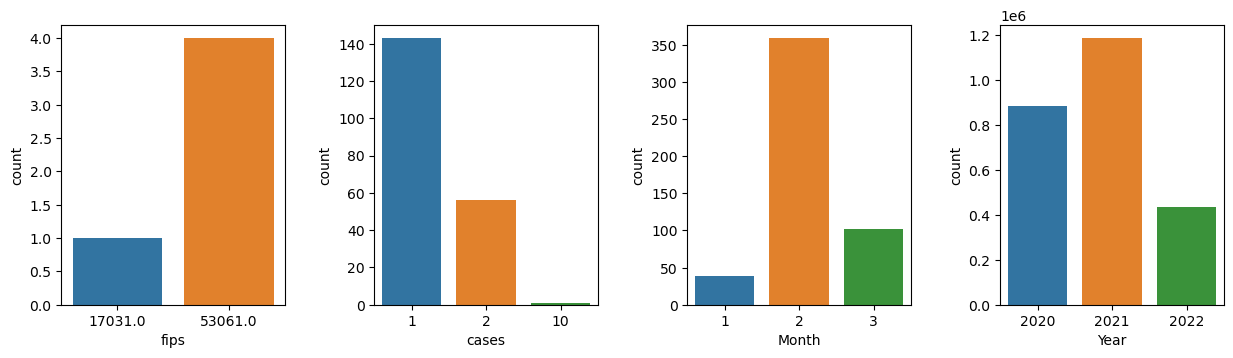

In [21]:
plt.figure(1,figsize=(15,8))
plt.subplots_adjust(wspace=0.4,hspace=0.2)

plt.subplot(241)
sns.countplot(x='fips', data=df1.head())

plt.subplot(242)
sns.countplot(x='cases', data=df1.head(200))

plt.subplot(243)
sns.countplot(x='Month',data=df1.head(500))

plt.subplot(244)
sns.countplot(x='Year',data=df1)



From the above graphs we can coclude that:
    1) Counts of fips 17031 is 1 & 53061 is 4
    2) counts of cases 1 is 140 &cases 2 is 50
    3) count of 2nd month is 350 whch is maximun
    4)count of year is max in 2021.

<AxesSubplot:xlabel='state', ylabel='count'>

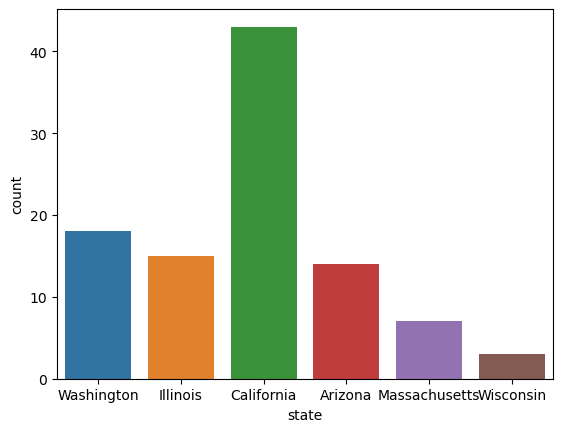

In [22]:
sns.countplot(x='state',data=df1.head(100))

from the above graph we can conclude that max count of state which shows californisa hax max 42 Count

# Bivariate Analysis

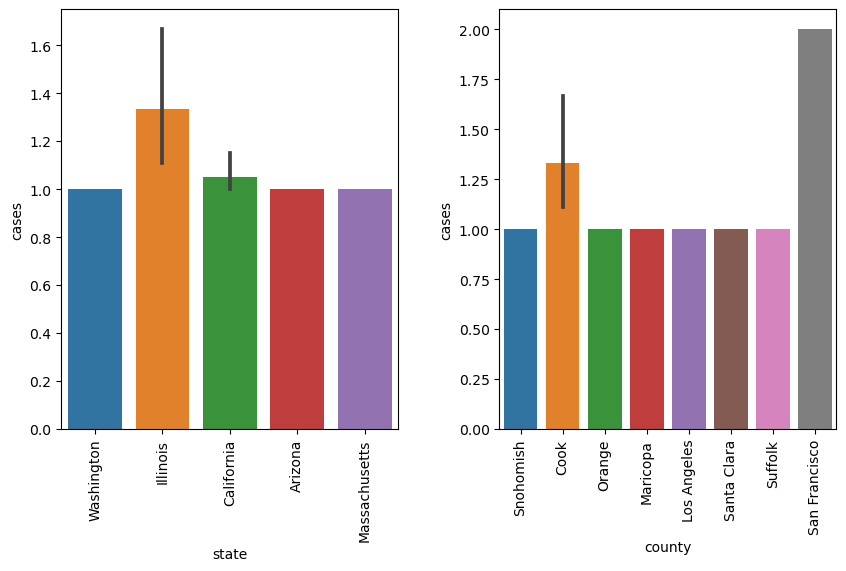

In [23]:
plt.figure(figsize=(10,12))
plt.subplots_adjust(wspace=0.3)

plt.subplot(221)
sns.barplot(x='state',y='cases',data=df1.head(50))
plt.xticks(rotation=90);

plt.subplot(222)
sns.barplot(x='county',y='cases',data=df1.head(50))
plt.xticks(rotation=90);



From the above graph we can conclude that cases found in county which shows that san francisco has maximum cases 2

From the aove graph we can conclide that deaths in state which shows that san francisco has ,maximum deaths are in washington 3.5

In [24]:
df1['county'].unique()

array(['Snohomish', 'Cook', 'Orange', ..., 'Kalawao', 'Rota',
       'Pending County Assignment'], dtype=object)

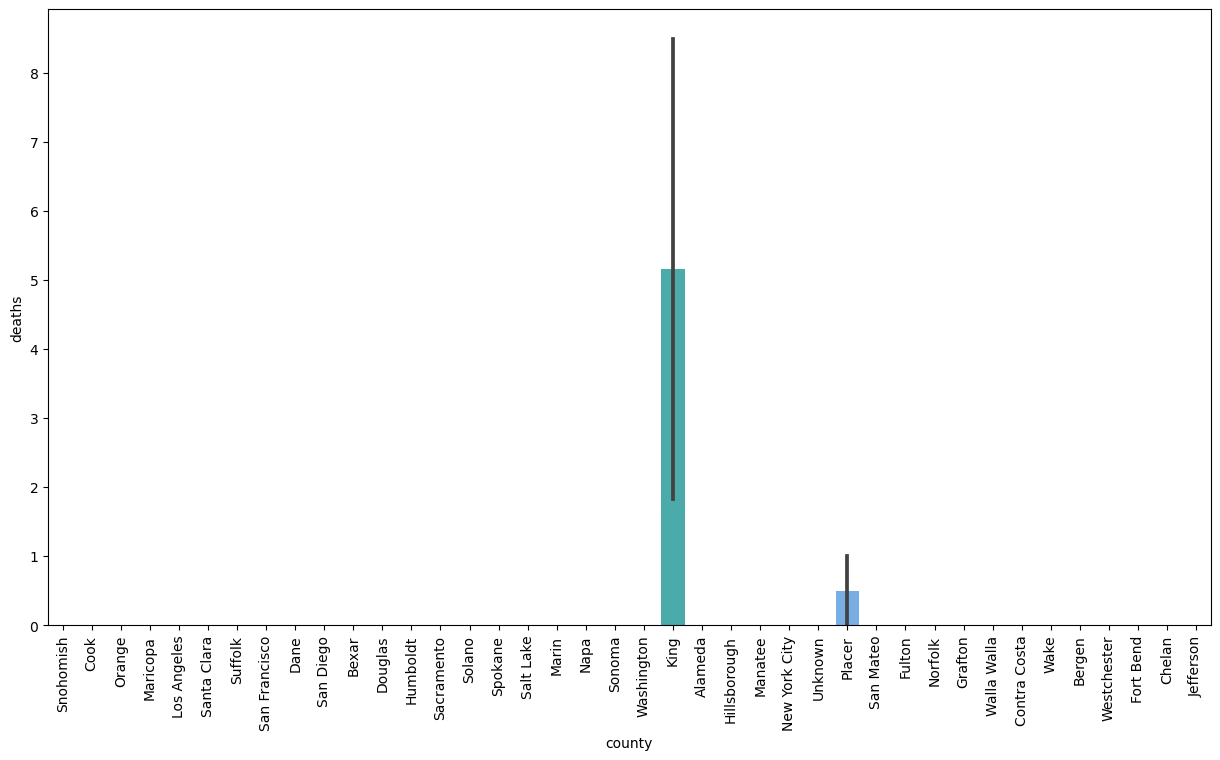

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(x='county',y='deaths',data=df1.head(550))
plt.xticks(rotation=90);

From the above graph we can conclude that deaths in county which shows that san francisco has maximum deaths 2

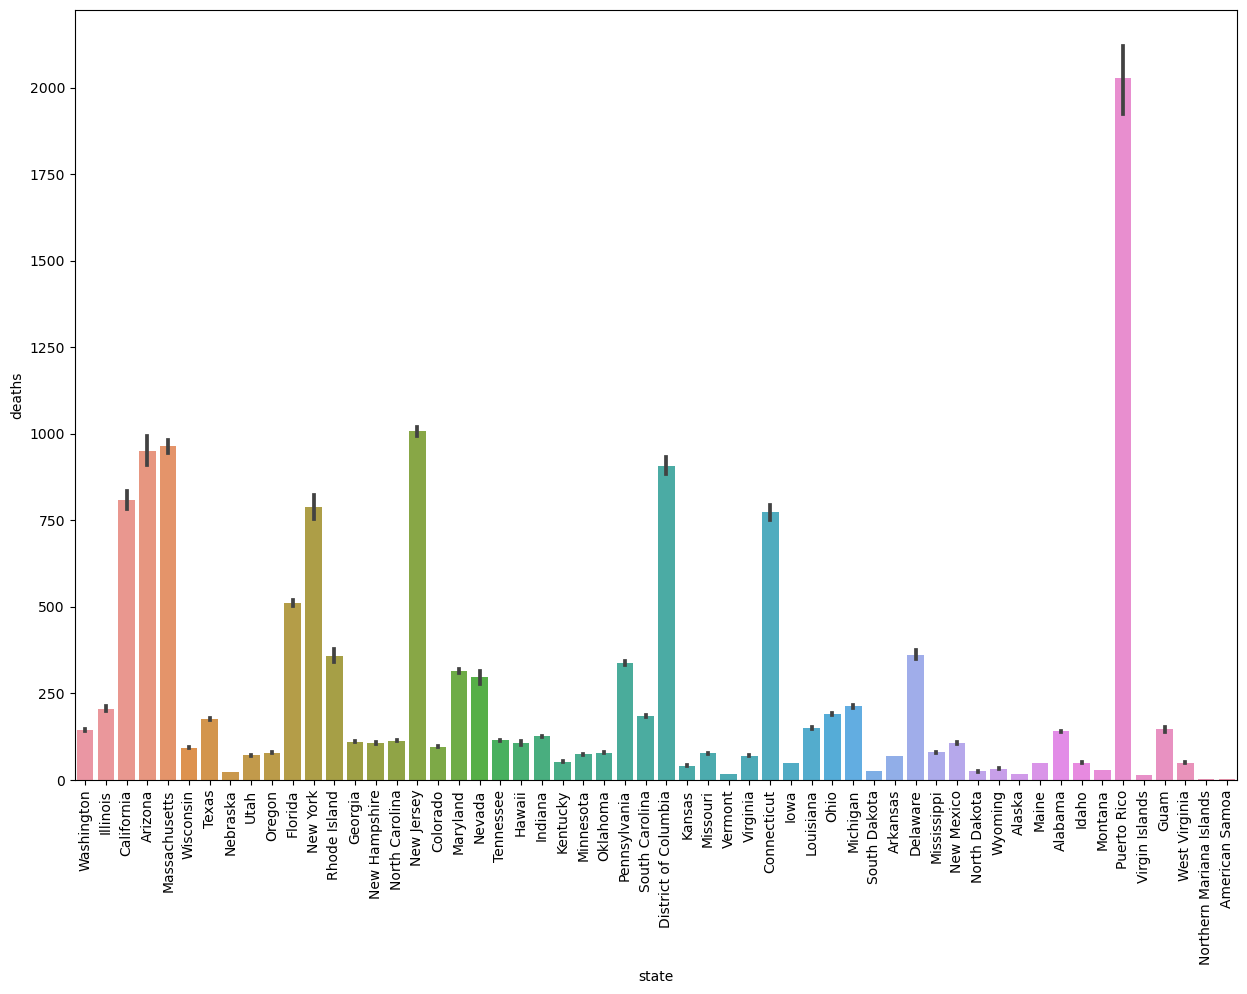

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(x='state',y='deaths',data=df1)
plt.xticks(rotation=90);


From the above graph we can conclide that deaths in state which shows that san francisco has ,maximum deaths are in perto Rico 3.5

In [27]:
# df1.head()

In [28]:
df2=df1.sort_values('deaths',ascending=True)

Text(0.5, 1.0, 'Day VS Deaths Graph')

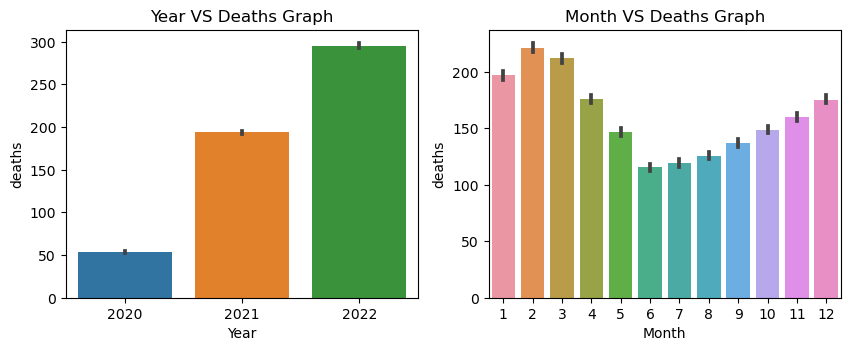

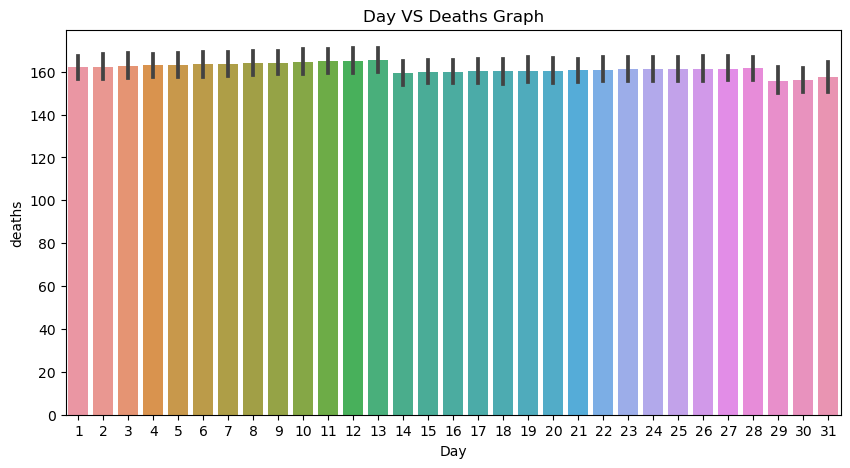

In [29]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=0.2,hspace=0.3)

plt.subplot(221)
sns.barplot(x='Year',y='deaths',data=df1)
plt.title('Year VS Deaths Graph')

plt.subplot(222)
sns.barplot(x='Month',y='deaths',data=df2)
plt.title('Month VS Deaths Graph')

plt.figure(figsize=(10,5))
sns.barplot(x='Day',y='deaths',data=df1)
plt.title('Day VS Deaths Graph')


Here in this graph we can see year vs deaths, month vs deaths & Day vs deaths 

Text(0.5, 1.0, 'Day VS Cases Graph')

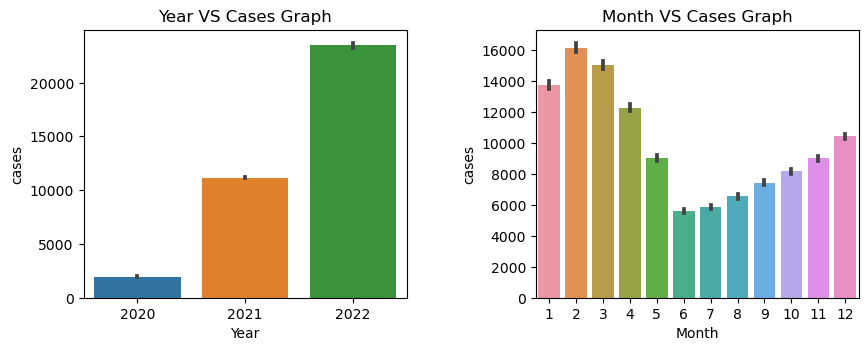

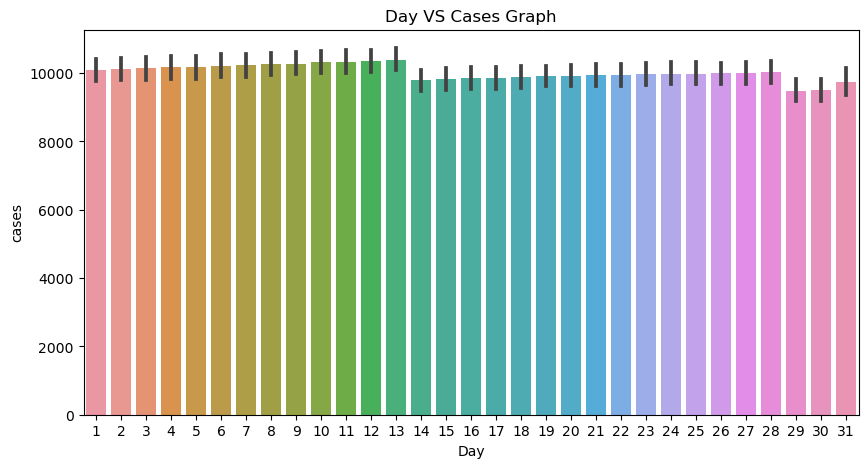

In [30]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=0.3,wspace=0.4)

plt.subplot(221)
sns.barplot(x='Year',y='cases',data=df1)
plt.title('Year VS Cases Graph')

plt.subplot(222)
sns.barplot(x='Month',y='cases',data=df1)
plt.title('Month VS Cases Graph')


plt.figure(figsize=(10,5))
sns.barplot(x='Day',y='cases',data=df1)
plt.title('Day VS Cases Graph')


as we have seen that our dataset contains all object & float/ integer datatypes.
for machime algorithm we need to convert them in to numeric form so we will convert it using encoding as below

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
for i in df1.columns:
    if df1[i].dtypes == 'object':
        lb=LabelEncoder()
        df1[i]=lb.fit_transform(df1[i])
df1        

,county,state,fips,cases,deaths,Date,Year,Month,Day
0,1601,52,53061.0,1,0.0,2020-01-21,2020,1,21
1,1601,52,53061.0,1,0.0,2020-01-22,2020,1,22
2,1601,52,53061.0,1,0.0,2020-01-23,2020,1,23
3,414,15,17031.0,1,0.0,2020-01-24,2020,1,24
4,1601,52,53061.0,1,0.0,2020-01-24,2020,1,24
...,...,...,...,...,...,...,...,...,...
2502827,1683,55,56037.0,11088,126.0,2022-05-13,2022,5,13
2502828,1708,55,56039.0,10074,16.0,2022-05-13,2022,5,13
2502829,1765,55,56041.0,5643,39.0,2022-05-13,2022,5,13
2502830,1828,55,56043.0,2358,44.0,2022-05-13,2022,5,13


After converting our dataset into numeric form we will seperate its Fearures & Labels & Assign them variable as x & y

In [33]:
x=df1.drop(['deaths','Date'],axis=1)
x=x.fillna(0.0)
y=df1['deaths']
y=y.fillna(0.0)

In [34]:
x.isnull().sum()

county    0
state     0
fips      0
cases     0
Year      0
Month     0
Day       0
dtype: int64

In [35]:
y.isnull().sum()

0

In [36]:
!pip install prettytable
from prettytable import PrettyTable


In [37]:
models_results_rmse = {}
models_results_r2 = {}
def evaluate(y_t, y_p, title):
    table = PrettyTable()
    table.field_names = ['Metric', 'Value']
    rmse = mean_squared_error(y_t, y_p, squared=False).round(4)
    r2 = r2_score(y_t, y_p).round(4)
    
    table.add_row(['RMSE', rmse])
    table.add_row(['R2 Score', r2])
    
    models_results_rmse[title] = rmse
    models_results_r2[title] = r2
    print(table)

Here we will make Our Training & Testing Models For application of ML Algorithm

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)


We will apply Linear Regression to our dataset here

In [184]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

modelLR = LinearRegression() 
modelLR.fit(x_train, y_train)
# y_pred = modelLR.predict(x_test)

LinearRegression()

In [40]:
modelLR.score(x_train,y_train)

0.8027335911917487

In [41]:
y_pred = modelLR.predict(x_test)

In [42]:
r2_score(y_test,y_pred)

0.7945386949894985

In [43]:
mean_squared_error(y_test,y_pred)

135056.56640815383

In [44]:
evaluate(y_test,y_pred,title='LinearRegression')

+----------+----------+
|  Metric  |  Value   |
+----------+----------+
|   RMSE   | 367.5004 |
| R2 Score |  0.7945  |
+----------+----------+


Using of Linear Regression models r2 score is 79% Which is good.
Root Mean Scored Error is 367.5004

After Linar Regression we will check by using DecisionTreeRegressor

In [45]:
from sklearn.tree import DecisionTreeRegressor

modelDTR = DecisionTreeRegressor(max_depth=3)
modelDTR.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=3)

In [46]:
modelDTR.score(x_train, y_train)

0.848788476849408

In [47]:
y_predDTR=modelDTR.predict(x_test)

In [48]:
r2_score(y_test,y_predDTR)

0.8376902072647402

In [49]:
mean_squared_error(y_test,y_predDTR)

106691.63860378899

In [50]:
evaluate(y_test,y_predDTR,title='DecisionTreeRegressor')

+----------+----------+
|  Metric  |  Value   |
+----------+----------+
|   RMSE   | 326.6369 |
| R2 Score |  0.8377  |
+----------+----------+


Using of DecisionTreeRegressor models r2 score is 83 % Which is good.


Our model is taking too much time for training model so he have tool only 10000 rows to train.
so it will in short time.

we will use RandomForestRegressor to check models score.

In [51]:
x=x.head(10000)
y=y.head(10000)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [52]:
from sklearn.ensemble import RandomForestRegressor

modelRFR = RandomForestRegressor(max_depth=5)
modelRFR.fit(x_train, y_train)

RandomForestRegressor(max_depth=5)

In [53]:
modelRFR.score(x_train,y_train)

0.9410825129905283

In [54]:
y_predRFR=modelRFR.predict(x_test)

In [55]:
r2_score(y_test,y_predRFR)

0.8700220214436647

In [56]:
mean_squared_error(y_test,y_predRFR)

1.7704674651316703

In [57]:
evaluate(y_test,y_predRFR,title='RandomForestRegressor')

+----------+--------+
|  Metric  | Value  |
+----------+--------+
|   RMSE   | 1.3306 |
| R2 Score |  0.87  |
+----------+--------+


Using of RandomForestRegressor models r2 score is 86 % Which is good.


In [58]:
from sklearn.svm import SVR

modelSVR = SVR()
modelSVR.fit(x_train, y_train)

SVR()

In [59]:
modelSVR.score(x_train, y_train)

0.0007719756559626534

In [60]:
y_predSVR=modelSVR.predict(x_test)

In [61]:
r2_score(y_test,y_predSVR)

0.003965633945301472

In [62]:
mean_squared_error(y_test,y_predSVR)

13.567270847257983

In [63]:
evaluate(y_test,y_predSVR,title='SVR')

+----------+--------+
|  Metric  | Value  |
+----------+--------+
|   RMSE   | 3.6834 |
| R2 Score | 0.004  |
+----------+--------+


Using of SVR models r2 score is 0.04 % Which is not good.
so will check using XGBRegressor


In [64]:
from xgboost import XGBRegressor
modelXGB = XGBRegressor()
modelXGB.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [65]:
modelXGB.score(x_train, y_train)

0.998211163438136

In [66]:
y_predXGB=modelXGB.predict(x_test)

In [67]:
r2_score(y_test,y_predXGB)

0.9412464075279391

In [68]:
mean_squared_error(y_test,y_predXGB)

0.8002995975683966

In [69]:
evaluate(y_test,y_predXGB,title='XGBRegressor')

+----------+--------+
|  Metric  | Value  |
+----------+--------+
|   RMSE   | 0.8946 |
| R2 Score | 0.9412 |
+----------+--------+


Using of XGBRegressor models r2 score is 94 % Which is good.


# Feature importance for df1

In [134]:
imp_fea1=modelLR.coef_[modelLR.coef_>0]
imp_fea1

array([7.60862728, 0.01525241, 0.81276321])

In [135]:
coef=pd.DataFrame(modelLR.coef_,index=x.columns,columns=['coefficient'])
coef[coef>0.0]

,coefficient
county,NaN
state,7.608627
fips,NaN
cases,0.015252
Year,NaN
Month,0.812763
Day,NaN


In [137]:
df2=df1[['state','cases','Month']]
df2.head()

,state,cases,Month
0,52,1,1
1,52,1,1
2,52,1,1
3,15,1,1
4,52,1,1


In [143]:
fea_imp2=modelDTR.feature_importances_[modelDTR.feature_importances_>0]
fea_imp2

array([0.08864884, 0.91135116])

In [144]:
coef=pd.DataFrame(modelDTR.feature_importances_,index=x.columns,columns=['coefficient'])
coef[coef>0.0]

,coefficient
county,NaN
state,NaN
fips,0.088649
cases,0.911351
Year,NaN
Month,NaN
Day,NaN


In [148]:
df3=df1[['fips','cases']]
df3.head()

,fips,cases
0,53061.0,1
1,53061.0,1
2,53061.0,1
3,17031.0,1
4,53061.0,1


In [151]:
imp_fea3=modelRFR.feature_importances_[modelRFR.feature_importances_>0]
imp_fea3

array([0.06835756, 0.0632954 , 0.08193543, 0.7168312 , 0.06958042])

In [155]:
coef=pd.DataFrame(modelRFR.feature_importances_,index=x.columns,columns=['coefficient'])
coef

,coefficient
county,0.068358
state,0.063295
fips,0.081935
cases,0.716831
Year,0.000000
Month,0.000000
Day,0.069580


In [157]:
df4=df1[['county','state','fips','cases','Day']]
df4.head()

,county,state,fips,cases,Day
0,1601,52,53061.0,1,21
1,1601,52,53061.0,1,22
2,1601,52,53061.0,1,23
3,414,15,17031.0,1,24
4,1601,52,53061.0,1,24


In [167]:
imp_fea4=modelXGB.feature_importances_[modelXGB.feature_importances_>0]
imp_fea4

array([7.1455106e-02, 4.3226010e-01, 2.5108285e-02, 4.2343962e-01,
       2.3706873e-04, 4.7499839e-02], dtype=float32)

In [168]:
coef=pd.DataFrame(modelXGB.feature_importances_,index=x.columns,columns=['coefficient'])
coef

,coefficient
county,0.071455
state,0.432260
fips,0.025108
cases,0.423440
Year,0.000000
Month,0.000237
Day,0.047500


In [170]:
df5=df1[['county','state','fips','cases','Month','Day']]
df5.head()

,county,state,fips,cases,Month,Day
0,1601,52,53061.0,1,1,21
1,1601,52,53061.0,1,1,22
2,1601,52,53061.0,1,1,23
3,414,15,17031.0,1,1,24
4,1601,52,53061.0,1,1,24


In [174]:
impdf=df1[['fips','cases','Month','Day']]
impdf=impdf.head(10000)

In [177]:
x_train,x_test,y_train,y_test=train_test_split(impdf,y,random_state=0)
modelLR.fit(x_train,y_train)

LinearRegression()

In [178]:
modelLR.score(x_train,y_train)

0.5311958260880805

In [179]:
modelLR.score(x_test,y_test)

0.7453207307784371

In [181]:
modelXGB.fit(x_train,y_train)
             

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [182]:
modelXGB.score(x_train,y_train)

0.9977025034541124

In [183]:
modelXGB.score(x_test,y_test)

0.9446158594499978

In [185]:
y_predXGB=modelXGB.predict(x_test)

In [186]:
r2_score(y_test,y_predXGB)

0.9446158594499978

In [71]:
colors = ['#F0D290','#DE834D','#A3423C','#781D42']
colors2 = ['#F0D290','#DE834D','#A3423C','#781D42','#671E31']
colors3 = ['#f0d290','#e9c083','#e2af77','#d99d6d','#d08c64', '#c67b5d',
           '#bc6b56','#b05a51','#a34b4d','#963b49', '#872c45','#781d42']


# Model evaluation - R2 Score

<Figure size 2000x800 with 0 Axes>

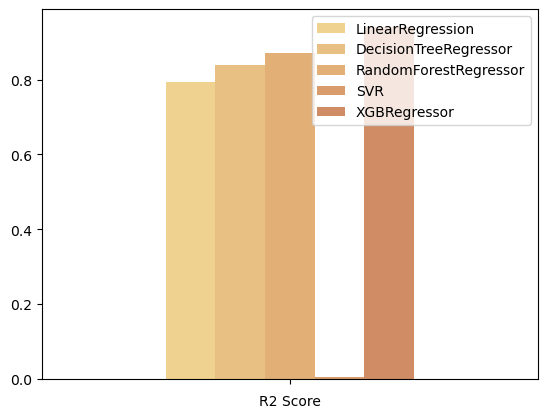

In [72]:
plt.figure(figsize=(20, 8))
pd.DataFrame(models_results_r2, index=['']).plot.bar(color=colors3);
plt.xlabel('R2 Score');

# Model evaluation - Root Mean Square Error

<Figure size 2000x800 with 0 Axes>

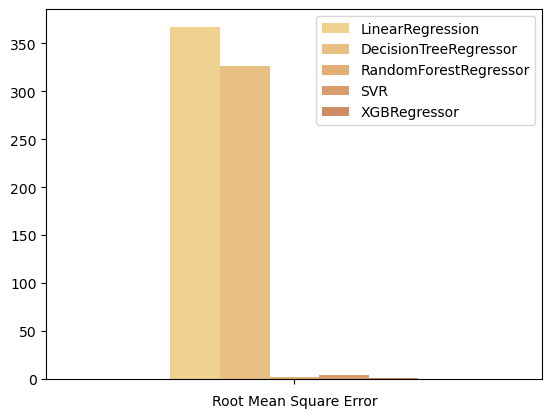

In [73]:
plt.figure(figsize=(20, 8))
pd.DataFrame(models_results_rmse, index=['']).plot.bar(color=colors3);
plt.xlabel('Root Mean Square Error');

In [74]:
models_results_rmse

{'LinearRegression': 367.5004,
 'DecisionTreeRegressor': 326.6369,
 'RandomForestRegressor': 1.3306,
 'SVR': 3.6834,
 'XGBRegressor': 0.8946}

In [75]:
df1.head()

,county,state,fips,cases,deaths,Date,Year,Month,Day
0,1601,52,53061.0,1,0.0,2020-01-21,2020,1,21
1,1601,52,53061.0,1,0.0,2020-01-22,2020,1,22
2,1601,52,53061.0,1,0.0,2020-01-23,2020,1,23
3,414,15,17031.0,1,0.0,2020-01-24,2020,1,24
4,1601,52,53061.0,1,0.0,2020-01-24,2020,1,24


In [76]:
df1.isnull().sum()

county        0
state         0
fips      23678
cases         0
deaths    57605
Date          0
Year          0
Month         0
Day           0
dtype: int64

In [77]:
df1=df1.fillna(0.0)

In [78]:
df1.isnull().sum()

county    0
state     0
fips      0
cases     0
deaths    0
Date      0
Year      0
Month     0
Day       0
dtype: int64

In [79]:
# df1.head()

In [80]:
df1['Year'].unique()

array([2020, 2021, 2022], dtype=int64)

In [81]:
def plot_forecasted_sales(y_pred, y_train, y_true=[], period=5, title=''):
    
    # plot
    plt.figure(figsize=(20, 8))
    plt.plot(y_train.to_list(), color=colors[0])
    plt.plot([None for i in y_train] + [x for x in y_pred], color=colors[2])
    
    # set legend
    if len(y_true) > 0:
        plt.plot([None for i in y_train] + [x for x in y_true], color=colors[1])
        plt.legend(['2020-2021 Acual cases', '2022 Acual cases', f'2022 Forecasted cases \
(RMSE = {mean_squared_error(y_true, y_pred, squared=False).round(1)}, R2 = {r2_score(y_true, y_pred).round(3)})'])
    else:
        plt.legend(['2020-2022 Actual cases', '2020-2022 Forecasted cases'])
    
    # set parameters
    plt.xticks(range(0, len(y_train) + len(y_pred), period), rotation=75)
    plt.xlabel('Week')
    plt.ylabel('cases')
    plt.title(title)
    plt.show()

# Final Forecasting using best performed model (XGBRegressor)

In [99]:
df1
x=df1.drop(['deaths','Date'],axis=1)
x

,county,state,fips,cases,Year,Month,Day
0,1601,52,53061.0,1,2020,1,21
1,1601,52,53061.0,1,2020,1,22
2,1601,52,53061.0,1,2020,1,23
3,414,15,17031.0,1,2020,1,24
4,1601,52,53061.0,1,2020,1,24
...,...,...,...,...,...,...,...
2502827,1683,55,56037.0,11088,2022,5,13
2502828,1708,55,56039.0,10074,2022,5,13
2502829,1765,55,56041.0,5643,2022,5,13
2502830,1828,55,56043.0,2358,2022,5,13


In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(x.to_numpy())
df_scaled
df_scaled = pd.DataFrame(df_scaled, columns=['county', 'state', 'fips', 'cases','Year','Month','Day'])
df_scaled

,county,state,fips,cases,Year,Month,Day
0,0.829104,0.945455,0.680008,3.438287e-07,0.0,0.000000,0.666667
1,0.829104,0.945455,0.680008,3.438287e-07,0.0,0.000000,0.700000
2,0.829104,0.945455,0.680008,3.438287e-07,0.0,0.000000,0.733333
3,0.214397,0.272727,0.218262,3.438287e-07,0.0,0.000000,0.766667
4,0.829104,0.945455,0.680008,3.438287e-07,0.0,0.000000,0.766667
...,...,...,...,...,...,...,...
2502827,0.871569,1.000000,0.718147,3.812373e-03,1.0,0.363636,0.400000
2502828,0.884516,1.000000,0.718172,3.463730e-03,1.0,0.363636,0.400000
2502829,0.914034,1.000000,0.718198,1.940225e-03,1.0,0.363636,0.400000
2502830,0.946660,1.000000,0.718224,8.107481e-04,1.0,0.363636,0.400000


In [85]:
df_scaled['fips']=df_scaled['fips'].fillna(0.0)

In [104]:
df_scaled['fips'].hasnans

False

In [109]:
df.iloc[6994:,-5]

6994         0.0
6995         0.0
6996         0.0
6997         0.0
6998         0.0
           ...  
2502827    126.0
2502828     16.0
2502829     39.0
2502830     44.0
2502831     18.0
Name: deaths, Length: 2495838, dtype: float64

In [117]:
y_pred = modelXGB.predict(df_scaled)[:100]
y_test = df.iloc[6994:,-5][:100]

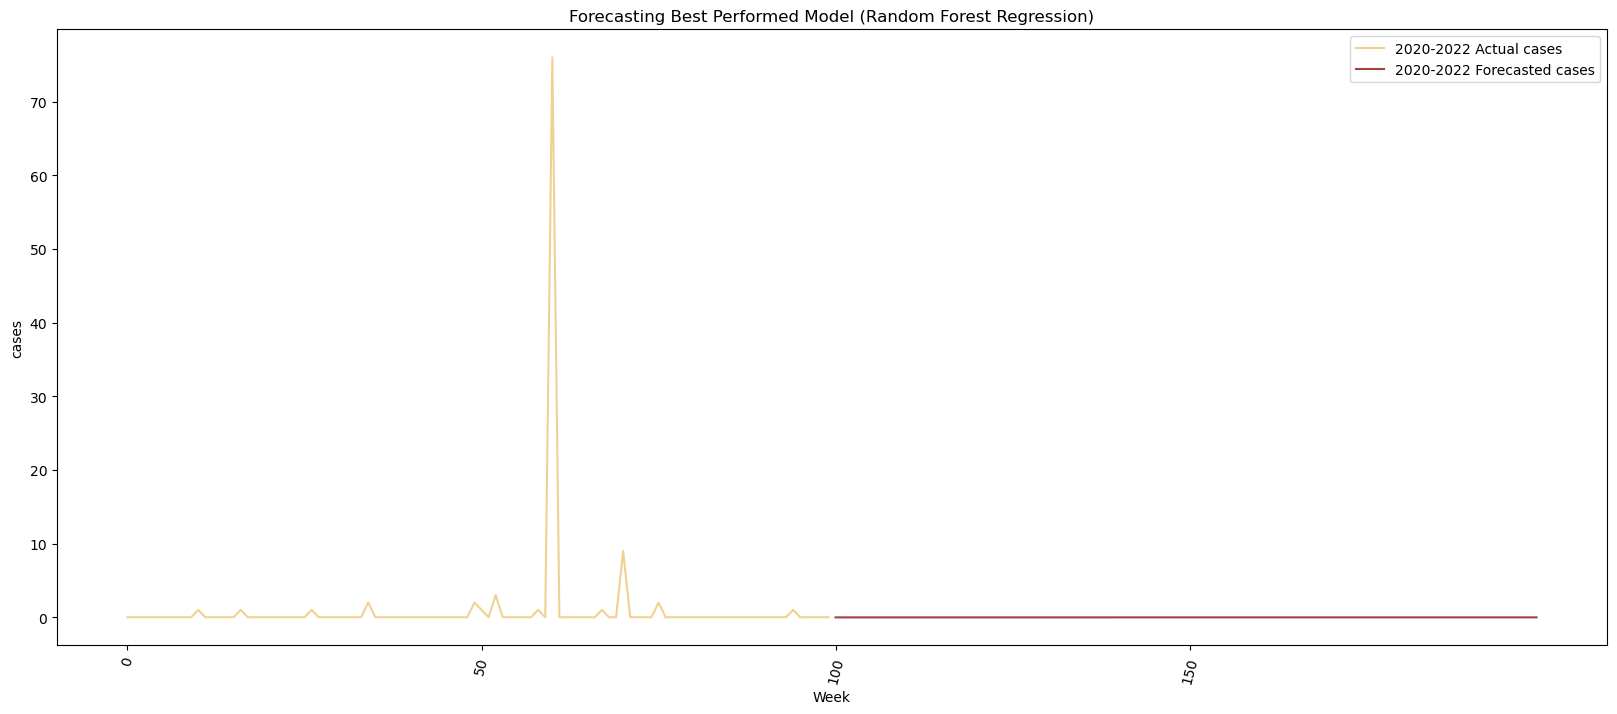

In [118]:
plot_forecasted_sales(y_train=y_test, y_pred=y_pred, period=50, title='Forecasting Best Performed Model (Random Forest Regression)')